# EJERCICIO MODELO DE MERCADO

### 🧠 Enunciado del ejercicio

En este ejercicio analizarás empíricamente el **CAPM** para comprender hasta qué punto la **beta** explica las rentabilidades observadas en los mercados financieros. Aprenderás a estimar betas y rentabilidades medias, a contrastar la relación teórica entre ambas y a evaluar por qué dicha relación suele ser **débil e inestable** en datos reales.

Además, estudiarás cómo esta relación **cambia según el estado del mercado**, comparando periodos claramente **alcistas y bajistas**. Finalmente, aplicarás estos resultados para construir y comparar **carteras condicionadas al régimen de mercado**, combinando activos de **alta beta en fases alcistas** y **baja beta en fases bajistas**, con el objetivo de entender las implicaciones económicas, dinámicas y prácticas del CAPM más allá de su formulación teórica.


### 🔹 Paso 1. Datos y rendimientos
- Descarga precios diarios de las acciones del **S&P 500** y del propio índice.
- Calcula los **rendimientos diarios** .



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import cvxpy as cp
import plotly.graph_objects as go
import statsmodels.api as sm
import warnings
from datetime import datetime, timedelta

sns.set(style="whitegrid")

In [2]:
# Nos bajamoslos precios diarios del SP500
start_date = '1996-01-01'
precios_indice = yf.download("SPY",
                             start=start_date,
                             auto_adjust=True)["Close"] # Precios ajustados al cierre

ret_indice_sp500 = np.log(precios_indice).diff().dropna()
ret_indice_sp500.shape

[*********************100%***********************]  1 of 1 completed


(7560, 1)

In [3]:
ret_indice_sp500.head()

Ticker,SPY
Date,
1996-01-03,0.002762
1996-01-04,-0.009574
1996-01-05,-0.002028
1996-01-08,0.003798
1996-01-09,-0.017334


In [4]:
tickers_sp500 = ['AAPL','ABT','ACGL','ADBE','ADI','ADM','ADP','ADSK','AEP','AES','AFL','AIG','AJG','ALB','ALL','AMAT','AMD','AME',
                 'AMGN','AON','AOS','APA','APD','APH','ATO', 'AVB','AVY','AXP','AZO','BA','BAC','BALL','BAX','BBWI','BBY','BDX',
                 'BEN','BIIB','BIO','BK','BKR','BMY','BRO','BSX','BWA','C','CAG','CAH','CAT','CB', 'CCL','CDNS','CHD','CI','CINF',
                 'CL','CLX','CMA','CMCSA','CMI','CMS','CNP','COF','COO','COP','COR','COST','CPB','CPRT','CPT','CSCO','CSX','CTAS',
                 'CTRA','CVS','CVX','D','DD','DE','DHI','DHR','DIS','DLTR','DOV','DRI','DTE','DUK','DVA','DVN','EA','ECL','ED','EFX',
                 'EG','EIX','EL','EMN','EMR','EOG','EQR','EQT','ES','ESS','ETN','ETR','EVRG','EXC','EXPD','F','FAST','FCX','FDX',
                 'FICO','FITB','FMC','FRT','GD','GE','GEN','GILD','GIS','GL','GLW','GPC','GWW','HAL','HAS','HBAN','HD','HIG','HOLX',
                 'HON','HPQ','HRL','HSIC','HST','HSY','HUBB','HUM','IBM','IDXX','IEX','IFF','INCY','INTC','INTU','IP','IT','ITW','IVZ',
                 'J','JBHT','JBL','JCI','JKHY', 'JNJ','JPM','KEY','KIM','KLAC','KMB','KO','KR','L','LEN','LH','LHX','LIN','LLY','LMT',
                 'LNT','LOW','LRCX','LUV','MAA','MAS','MCD','MCHP','MCK','MCO','MDT','MGM','MHK','MKC','MLM','MMC','MMM','MNST','MO','MOS',
                 'MRK','MS','MSFT','MSI','MTB','MTCH','MU','NDSN','NEE','NEM','NI','NKE','NOC','NSC','NTAP','NTRS','NUE','NVR','O','ODFL',
                 'OKE','OMC','ORCL','ORLY','OXY','PAYX','PCAR','PCG','PEG','PEP','PFE','PG','PGR','PH','PHM','PNC','PNR','PNW','POOL','PPG',
                 'PPL','PSA','PTC','QCOM','RCL','REG','REGN','RF','RHI','RJF','RMD','ROK','ROL','ROP','ROST','RTX','RVTY','SBUX','SCHW',
                 'SHW','SJM','SLB','SNA','SNPS','SO','SPG','SPGI','STE','STT', 'STZ','SWK','SWKS','SYK','SYY','T','TAP','TECH','TER','TFC',
                 'TFX','TGT','TJX','TMO','TRMB','TROW','TRV','TSCO','TSN','TT','TXN','TXT','TYL','UDR','UHS','UNH','UNP','USB','VFC','VLO',
                 'VMC','VRTX','VTRS','VZ','WAB','WAT','WDC','WEC','WELL','WFC','WHR','WM','WMB','WMT','WRB','WST','WY','XEL','XOM','XRAY','ZBRA','ZION']

In [5]:
precios_activos_sp500 = yf.download(tickers_sp500, start=start_date, auto_adjust=True)['Close']

[*********************100%***********************]  311 of 311 completed


In [6]:
ret_activos_sp500 = np.log(precios_activos_sp500).diff().dropna()
ret_activos_sp500.shape


(7560, 311)

In [7]:
ret_activos_sp500.head()

Ticker,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEP,AES,...,WMB,WMT,WRB,WST,WY,XEL,XOM,XRAY,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
1996-01-03,0.000000,0.002989,-0.010869,-0.060259,-0.052251,0.006826,0.010187,-0.014493,0.000000,-0.055881,...,-0.014225,0.010696,-0.009434,0.005249,-0.016667,0.012547,0.003096,0.012579,0.017890,-0.022329
1996-01-04,-0.017664,0.014815,0.005450,-0.031549,0.033901,0.013515,0.000000,-0.022142,0.006042,0.011429,...,-0.008633,0.010582,-0.009524,-0.010526,-0.016950,-0.012547,0.006164,-0.003130,-0.112478,-0.042840
1996-01-05,0.081718,-0.020803,-0.021979,-0.325422,0.000000,0.000000,0.013422,0.000000,0.000000,0.033523,...,-0.008708,-0.015916,-0.009616,0.010526,-0.017242,0.007547,0.024280,-0.015798,-0.040491,0.003361
1996-01-08,0.010889,0.017858,0.000000,-0.008916,-0.005571,-0.013515,0.000000,0.000000,-0.003016,-0.022223,...,0.000000,0.000000,0.012005,0.005222,-0.005814,-0.005024,0.011923,-0.006390,0.000000,-0.010118
1996-01-09,-0.055673,-0.007774,0.000000,-0.097103,-0.131140,-0.013698,0.018167,-0.045809,0.014993,0.000000,...,-0.002920,-0.016172,-0.007185,-0.010472,-0.015055,0.002515,-0.019448,0.000000,0.000000,-0.013652


In [8]:
ret_aligned = pd.concat([ret_activos_sp500, ret_indice_sp500], axis=1, join="inner")

In [9]:
ret_indice_sp500_aligned = ret_aligned.iloc[:, -1]
ret_activos_sp500_aligned = ret_aligned.iloc[:, :-1]

### 🔹 Paso 2. Estimación de betas
- Estima la **beta de cada activo** respecto al S&P 500 mediante una regresión lineal.
- Analiza cuántas **betas son significativas** con un nivel de confianza del 95%

- Representa los valores de beta.

*Objetivo*: entender la heterogeneidad del riesgo sistemático.


In [15]:
# -----------------------------------------
# PASO 2: ESTIMACIÓN DE BETAS (SIN WARNINGS)
# -----------------------------------------

betas = []
alphas = []
pvalues = []
r2_values = []

X = sm.add_constant(ret_indice_sp500_aligned)
X.columns = ["const", "Mercado"]

for activo in ret_activos_sp500_aligned.columns:

    y = ret_activos_sp500_aligned[activo]
    model = sm.OLS(y, X).fit()

    betas.append(model.params["Mercado"])
    alphas.append(model.params["const"])
    pvalues.append(model.pvalues["Mercado"])
    r2_values.append(model.rsquared)

# DataFrame resumen
resultados_betas = pd.DataFrame({
    "Beta": betas,
    "Alpha": alphas,
    "p_value_beta": pvalues,
    "R2": r2_values
}, index=ret_activos_sp500_aligned.columns)

resultados_betas["Significativa_95"] = resultados_betas["p_value_beta"] < 0.05
resultados_betas.head()

print(resultados_betas)


            Beta     Alpha   p_value_beta        R2  Significativa_95
Ticker                                                               
AAPL    1.111079  0.000491   0.000000e+00  0.251764              True
ABT     0.645379  0.000186   0.000000e+00  0.254199              True
ACGL    0.581747  0.000252  1.330322e-274  0.152854              True
ADBE    1.249541 -0.000004   0.000000e+00  0.300981              True
ADI     1.295138  0.000033   0.000000e+00  0.329567              True
...          ...       ...            ...       ...               ...
XEL     0.513741  0.000119  9.933713e-270  0.150337              True
XOM     0.798155  0.000060   0.000000e+00  0.349191              True
XRAY    0.708227 -0.000158   0.000000e+00  0.214545              True
ZBRA    1.027301 -0.000029   0.000000e+00  0.237478              True
ZION    1.189648 -0.000242   0.000000e+00  0.277692              True

[311 rows x 5 columns]


### 🔹 Paso 3. Betas y rentabilidades medias
- Calcula la **rentabilidad media** de cada activo.
- Representa gráficamente la relación **rentabilidad media – beta** y estima la recta asociada.

*Objetivo*: contrastar visual y empíricamente la predicción básica del CAPM.


### 🔹 Paso 4. Interpretación del CAPM incondicional
- Analiza la pendiente, el intercepto y el grado de ajuste de la regresión.
- Comenta si los resultados son coherentes con lo esperado según el CAPM.

*Objetivo*: desarrollar pensamiento crítico sobre la evidencia empírica del modelo.


### 🔹 Paso 5. Identificación de regímenes de mercado
- Grafica la evolución temporal del índice S&P 500.
- Selecciona un **periodo claramente alcista** y un **periodo claramente bajista**.

*Objetivo*: introducir la idea de estados o regímenes de mercado.


In [ ]:
fin_alcista = "2000-09-01"

fin_bajista = "2003-03-01"

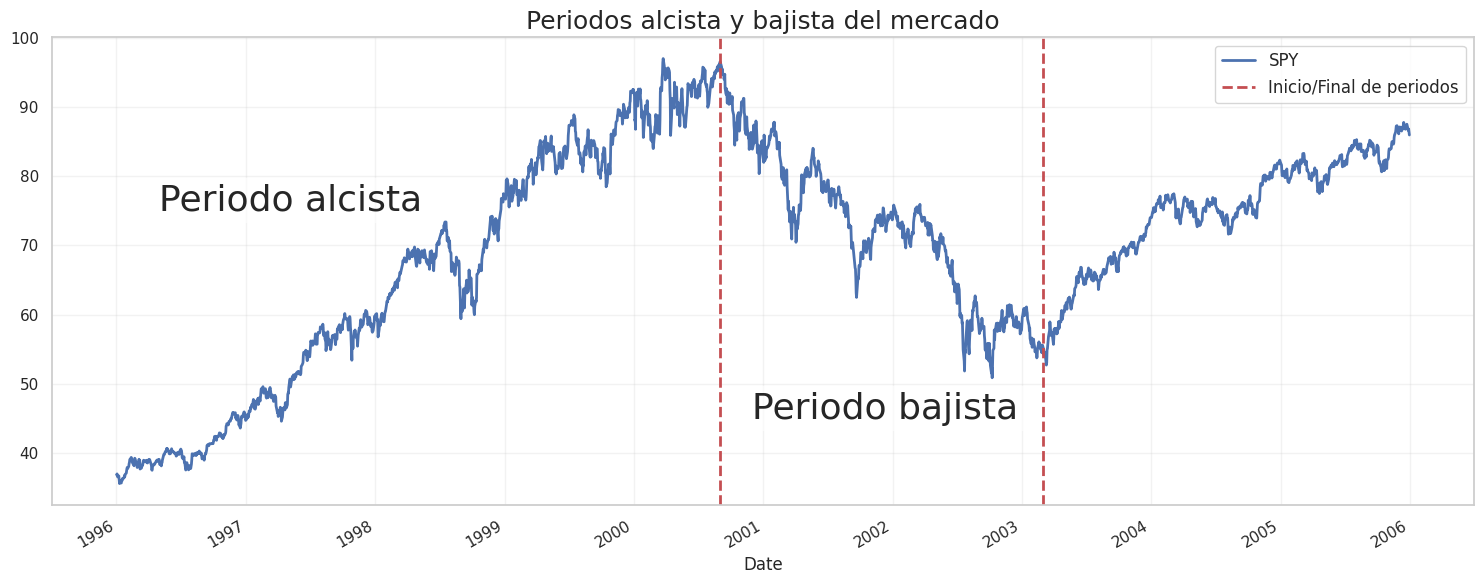

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

precios_indice.loc["1996":"2005"].plot(ax=ax, label="SP500", linewidth=2)

ax.axvline(fin_alcista, color="r", linestyle="--", linewidth=2, label="Inicio/Final de periodos")
ax.axvline(fin_bajista, color="r", linestyle="--", linewidth=2)

ax.text("1996-05", 75, "Periodo alcista", fontsize=26,
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none"))
ax.text("2000-12", 45, "Periodo bajista", fontsize=26,
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none"))

ax.set_title("Periodos alcista y bajista del mercado", fontsize=18)
ax.grid(True, alpha=0.25)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

### 🔹 Paso 6. CAPM por régimen
- Repite la estimación de betas y la regresión rentabilidad–beta:
  - usando solo datos del periodo alcista,
  - usando solo datos del periodo bajista.
- Compara los resultados entre ambos regímenes.

*Objetivo*: analizar la **inestabilidad temporal** de la relación beta–retorno.


**PERIODO ALCISTA**

**PERIODO BAJISTA**

### 🔹 Paso 7. Construcción de carteras condicionadas al régimen
- Construye una cartera de **alta beta** para el periodo alcista.
- Construye una cartera de **baja beta** para el periodo bajista.
- Analiza la evolución temporal de ambas carteras comparándola con el índice y la cartera equiponderada.

*Objetivo*: traducir resultados econométricos en decisiones de inversión.


La estrategia de rebalanceo de carteras utilizando las betas implica primero calcular las betas de los activos. Luego, se seleccionan los 10 activos con las betas más altas y los 10 con las más bajas.

- Durante un periodo de mercado alcista, se construye y mantiene una cartera equiponderada con los activos de mayor beta.

- Al entrar en un periodo bajista, la estrategia cambia hacia la cartera compuesta por los activos de menor beta.

### 🔹 Paso 8. Análisis conjunto y conclusiones
- Compara el comportamiento de las carteras a lo largo del tiempo.
- Discute las implicaciones para:
  - la validez empírica del CAPM,
  - el uso práctico de la beta,
  - la importancia de los regímenes de mercado.

*Objetivo*: conectar teoría financiera, evidencia empírica y estrategia de inversión.


### **TIMING**

Es crucial ser precavido con las estrategias de timing, dado que predecir los cambios exactos en el mercado es extremadamente difícil. Equivocarse incluso por unos pocos días puede alterar significativamente las rentabilidades esperadas.

<center>
<img src="https://drive.google.com/uc?export=view&id=1zoR_BdrC4S5k-_bhDgYkOJU0XEO8WZSy"
           width="760"
           alt="LogoBME">

           Fuente: Alvaro Gañinanes master MIAX Instituto BME
</center>



### **GENERACIÓN DE ALPHA**

¿Qué dicen los datos históricos sobre si los gestores de fondos son capaces de generar alpha?.

Existen numerosos estudios al respecto. Abajo se pueden ver dos ejemplos en los que se confirma que solo un porcentaje muy bajo de gestores son capaces de generar alpha de manera consistente

Informe de Funspeople [¿Es cierto que la gestión pasiva es mejor que la activa?](https://fundspeople.com/es/es-cierto-que-la-gestion-pasiva-es-mejor-que-la-activa/)

<center>
<img src="https://drive.google.com/uc?export=view&id=1yNZITIcBnKalTrFe9UvzSVPh9LHkLNJp"
           width="760"
           alt="Morningstar: Fondos superan índice">

           Fuente: MorningStar
</center>

